### Scikit Learn

In [1]:
%pip install --upgrade scikit-learn==1.7.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.datasets import fetch_openml

housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [70]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.pylab import plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Load California Housing data
housing = fetch_california_housing()
X = housing.data        # Features
y = housing.target      # Target values

# Create and train the model
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",  KNeighborsRegressor(n_neighbors=1))
])
pipe.fit(X, y)
# pipe.get_params()

# pred = pipe.predict(X)



Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [71]:
mod = GridSearchCV(estimator=pipe,
            param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
            cv=3)

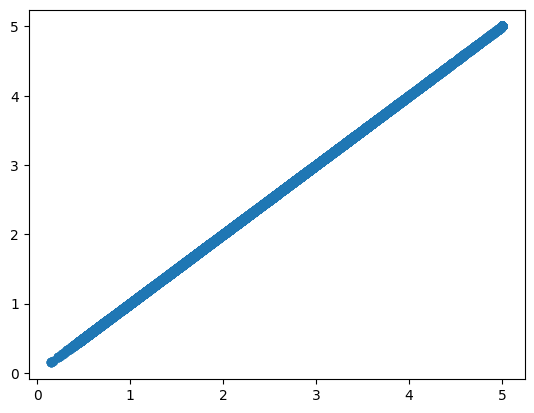

In [72]:

# plt.scatter(pred, y)
plt.scatter(pred, y)

In [61]:
mod.fit(X, y);
pd.DataFrame(mod.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.035861      0.005023         0.732036        0.053926   
1       0.033779      0.002268         0.826806        0.074106   
2       0.032018      0.001386         0.882763        0.075741   
3       0.033621      0.000948         0.922874        0.076275   
4       0.038648      0.009811         0.997481        0.050107   
5       0.032713      0.001017         0.987061        0.068324   
6       0.032119      0.000487         1.029430        0.087843   
7       0.033427      0.001238         1.076393        0.064532   
8       0.036676      0.006189         1.314907        0.066124   
9       0.041153      0.008665         1.163550        0.099890   

   param_model__n_neighbors                      params  split0_test_score  \
0                         1   {'model__n_neighbors': 1}           0.324068   
1                         2   {'model__n_neighbors': 2}           0.468788   
2                         3   {'model__n_neighbors': 3}           0.518547   
3                         4   {'model__n_neighbors': 4}           0.540323   
4                         5   {'model__n_neighbors': 5}           0.551149   
5                         6   {'model__n_neighbors': 6}           0.558435   
6                         7   {'model__n_neighbors': 7}           0.564207   
7                         8   {'model__n_neighbors': 8}           0.568637   
8                         9   {'model__n_neighbors': 9}           0.571972   
9                        10  {'model__n_neighbors': 10}           0.573760   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.334830           0.323371         0.327423        0.005245   
1           0.503457           0.424388         0.465544        0.032361   
2           0.543340           0.473595         0.511827        0.028867   
3           0.564974           0.499827         0.535041        0.026857   
4           0.579313           0.511781         0.547414        0.027696   
5           0.586185           0.521134         0.555251        0.026652   
6           0.590509           0.525223         0.559979        0.026820   
7           0.593942           0.529337         0.563972        0.026580   
8           0.594863           0.529928         0.565588        0.026891   
9           0.595831           0.532973         0.567522        0.026038   

   rank_test_score  
0               10  
1                9  
2                8  
3                7  
4                6  
5                5  
6                4  
7                3  
8                2  
9                1

In [66]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce